In [1]:
"""
Пример автоматического определения путей для примера поставляемого с Unifloc VBA
работает, только если расчетный файл находится во вложенной папке относительно надстройки.
Для других вариантов расположения расчетного файла - ссылки на папки надо модифицировать
""" 

import os
import sys
import inspect

current_path = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
print('Текущая папка где находится скрипт python -- '+ current_path)

# все примеры находятся во вложенной папке репозитория Unifloc VBA 
# поэтому здесь определяется путь к папке репозитория Unifloc VBA 
# если надо - подмените путь здесь на свой
unifloc_path = os.path.dirname(current_path)
print('Путь к папке Unifloc VBA -- '+ unifloc_path)

unifloc_xlam = unifloc_path +'\\UniflocVBA_7.xlam'
print('Путь к надстройке Unifloc VBA -- '+ unifloc_xlam)

# добавим в путь поиска пакетов python папку где находится репозиторий Unifloc VBA
sys.path.insert(0, unifloc_path) 
# импортируем python_api для Unifloc VBA
import unifloc_vba_python_api.python_api as unifloc
# создаем объект имеющий доступ к расчетам Unifloc VBA
unf = unifloc.API(unifloc_xlam)

Текущая папка где находится скрипт python -- D:\unifloc\unifloc_vba\examples_python
Путь к папке Unifloc VBA -- D:\unifloc\unifloc_vba
Путь к надстройке Unifloc VBA -- D:\unifloc\unifloc_vba\UniflocVBA_7.xlam


In [2]:
# импортируем дополнительные библиотеки
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pvt = unf.encode_PVT()

In [5]:
help(unf.PVT_rs_m3m3)

Help on method PVT_rs_m3m3 in module unifloc_vba_python_api.python_api:

PVT_rs_m3m3(p_atma, t_C, PVT_prop) method of unifloc_vba_python_api.python_api.API instance
    ========== description ============== 
    расчет газосодержания 
           
    ==========  arguments  ============== 
    
        p_atma - давление, атм    
    
        t_c - температура, с.    
    
        pvt_prop - строка с параметрами флюида,  используйте encode_pvt для ее генерации



In [6]:
unf.PVT_rs_m3m3(10,20,pvt)

3.5193339179534653

In [7]:
p = np.linspace(1, 300, 100)

In [8]:
rs = np.vectorize(unf.PVT_rs_m3m3)

In [9]:
rs_array  = rs(p,20,pvt)

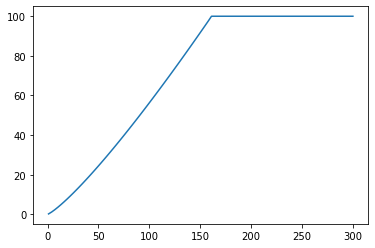

In [10]:
plt.plot(p, rs_array)